In [63]:
import pandas as pd
from sklearn.linear_model import LassoCV, LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [6]:
PATH = r"C:\Users\Tong Chen Rong\Desktop\cleague\data\Fifa 23 Players Data.csv"

In [7]:
df = pd.read_csv(PATH)

In [10]:
df.head(20)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


In [13]:
positions = df["Best Position"].unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [23]:
CAM = df[df["Best Position"] == "CAM"]

In [26]:
Y = CAM["CAM Rating"]

In [89]:
FEATURE_NAMES = ['Age', 'Height(in cm)', 'Weight(in kg)','Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes']

In [44]:
X = CAM[FEATURE_NAMES]

In [71]:
model = LassoCV(cv=5, max_iter=5000)
clf = model.fit(X, Y)

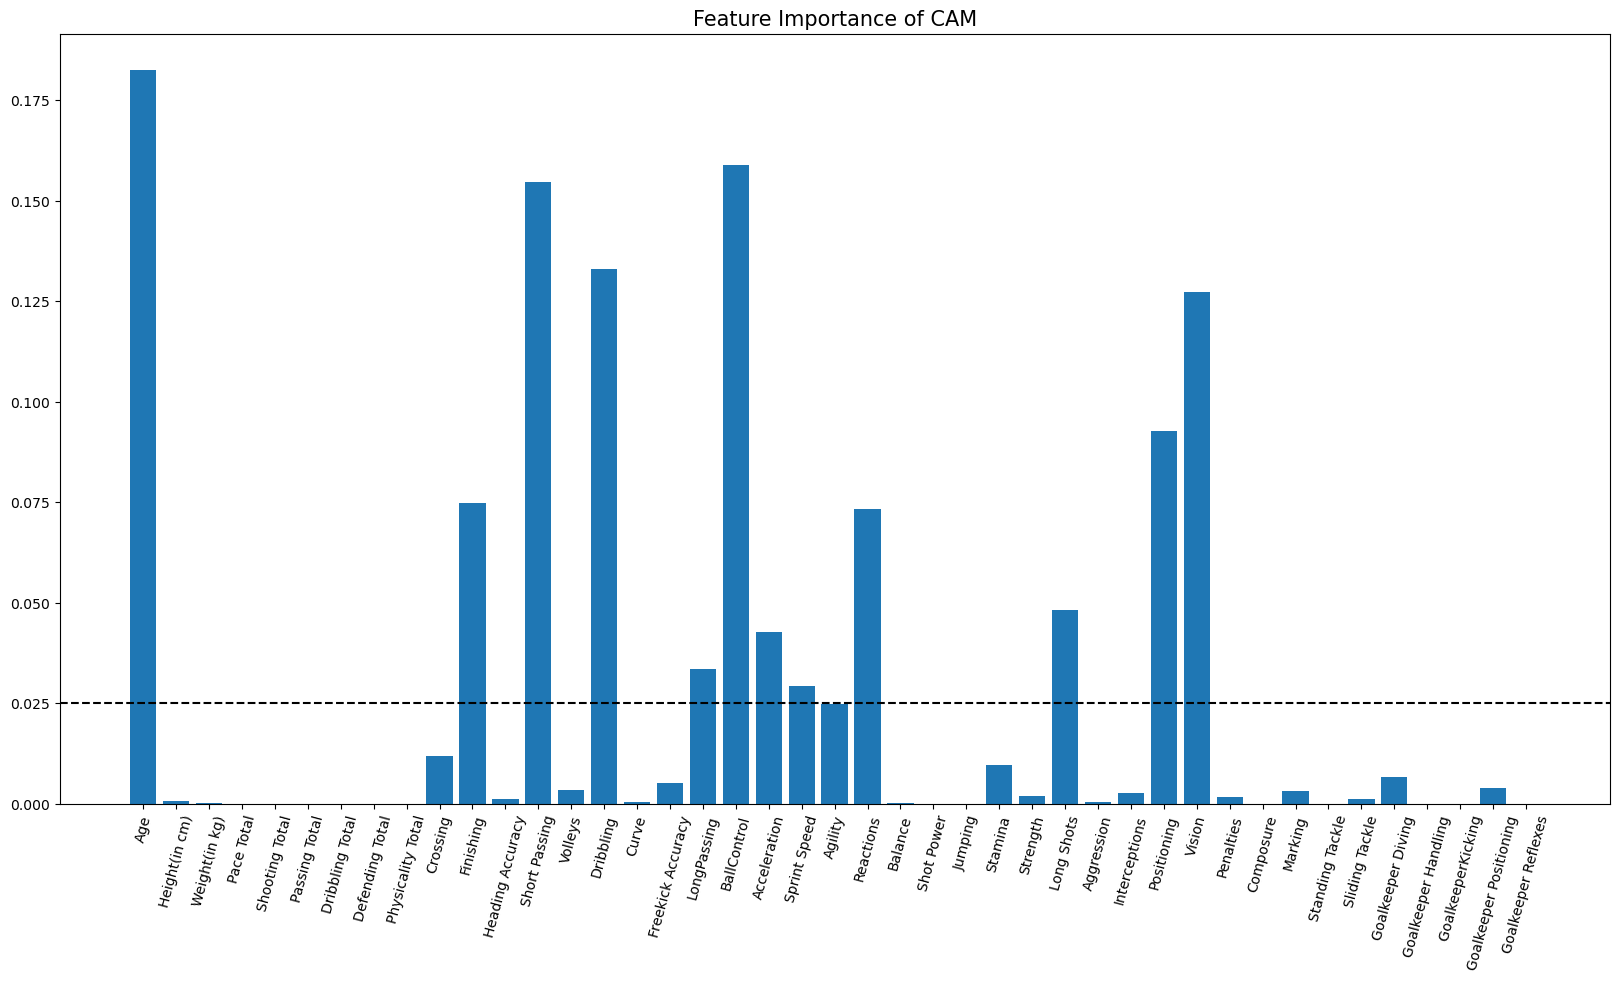

In [81]:
importance = pd.Series(np.abs(clf.coef_))
plt.figure(figsize=(20,10))
plt.bar(x = FEATURE_NAMES, height=importance)
plt.xticks(rotation = 75)
plt.axhline(y=0.025, color='k', linestyle='--')
plt.title("Feature Importance of {}".format("CAM"), fontdict={'fontsize':15})
plt.show()

In [73]:
np.sum(importance)

1.2291369721950696

In [49]:
model2 = LinearRegression()
clf2 = model2.fit(X, Y)

In [50]:
clf2.coef_

array([-0.18835573, -0.00424734, -0.00312048, -0.06280205, -0.05616354,
        0.06528324,  0.01776962,  0.06694269, -0.0238042 ,  0.00045574,
        0.10071711, -0.0041677 ,  0.1334883 , -0.00173018,  0.12343621,
       -0.0052447 , -0.00942452,  0.02444179,  0.15496479,  0.07060654,
        0.06292706,  0.02472758,  0.07393644, -0.0007509 ,  0.01038774,
        0.00065455,  0.01493427,  0.01686278,  0.06176498,  0.00292998,
       -0.01865916,  0.0960137 ,  0.11664446,  0.0003087 , -0.00487951,
       -0.01554396, -0.0197469 , -0.0046802 , -0.01254426, -0.00225712,
       -0.0055093 ,  0.01112452, -0.00327769])

In [92]:
def calculateImportance(positionCode:str):
       players = df[df["Best Position"] == positionCode]
       y = players[positionCode + ' Rating']
       X = players[FEATURE_NAMES]
       model = LassoCV()
       clf = model.fit(X, y)
       importance = pd.Series(np.abs(clf.coef_))
       plt.figure(figsize=(20,10))
       plt.bar(x = FEATURE_NAMES, height=importance)
       plt.xticks(rotation = 75)
       plt.axhline(y=0.025, color='k', linestyle='--')
       plt.title("Feature Importance of {}".format("CAM"), fontdict={'fontsize':15})
       plt.savefig("foo.png".format(positionCode))
       return importance

0     0.069702
1     0.000000
2     0.000000
3     0.202172
4     0.000000
5     0.000000
6     0.000000
7     0.000861
8     0.000000
9     0.000000
10    0.000646
11    0.000913
12    0.000000
13    0.000000
14    0.000640
15    0.000000
16    0.000000
17    0.109200
18    0.000000
19    0.000000
20    0.001110
21    0.000000
22    0.000525
23    0.000000
24    0.000862
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.002351
30    0.000000
31    0.000000
32    0.000000
33    0.207551
34    0.213347
35    0.047806
36    0.010487
37    0.215814
dtype: float64

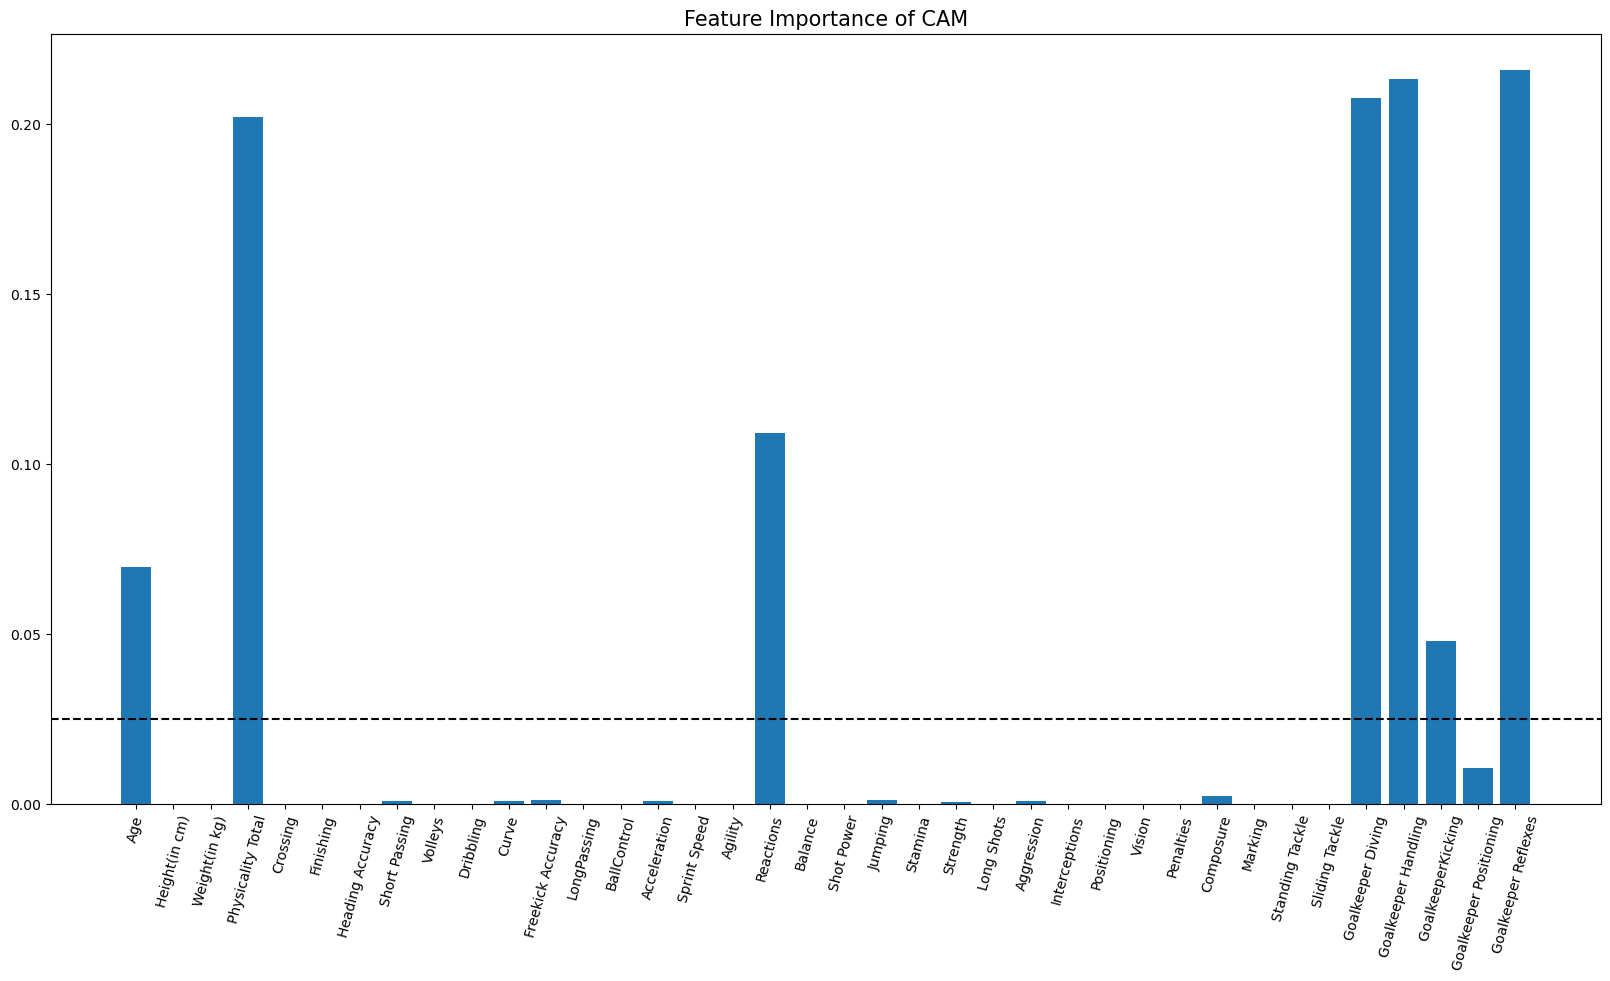

In [93]:
calculateImportance("GK")